# Classification using a Decision Tree

**In this exercise we have to predict the total number of bikes used, by working on the 'Bike Sharing in Washington D.C.' dataset**

*The total number of bikes is described by the 'cnt' column. These bikes are the summation of 'casual' and 'registered' columns. An approach would be to predict separately the 'casual' bikes and then the 'registered' bikes. We could then sum them up and finally predict the total number of bikes. In this exercise though we exclude from the dataset the 'casual' and 'registered' bikes, and we try to predict directly the total number of bikes.*

**Connect to GDrive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Load the libraries**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pandas as pd
import pydotplus

**Load the dataset**

In [ ]:
dataset=pd.read_csv('/content/gdrive/MyDrive/day.csv')
df=pd.DataFrame(data=dataset)

# Exploratory Analysis

In [ ]:
list(df.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
# Change columns to be more readable
df=df.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "weekday": "day_of_the_week", "workingday": "working_day",
                      "weathersit": "weather_situation", "temp": "real_temperature", "atemp": "feeling_temperature",
                      "hum": "humidity", "windspeed": "wind_speed", "cnt": "num_of_bikes"})

In [ ]:
df.head(10)

,instant,date,season,year,month,holiday,day_of_the_week,working_day,weather_situation,real_temperature,feeling_temperature,humidity,wind_speed,casual,registered,num_of_bikes
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
df.tail(10)

,instant,date,season,year,month,holiday,day_of_the_week,working_day,weather_situation,real_temperature,feeling_temperature,humidity,wind_speed,casual,registered,num_of_bikes
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
# 731 instances, 16 columns
df.shape

(731, 16)

In [ ]:
# integers, floatables, objects
df.dtypes

instant                  int64
date                    object
season                   int64
year                     int64
month                    int64
holiday                  int64
day_of_the_week          int64
working_day              int64
weather_situation        int64
real_temperature       float64
feeling_temperature    float64
humidity               float64
wind_speed             float64
casual                   int64
registered               int64
num_of_bikes             int64
dtype: object

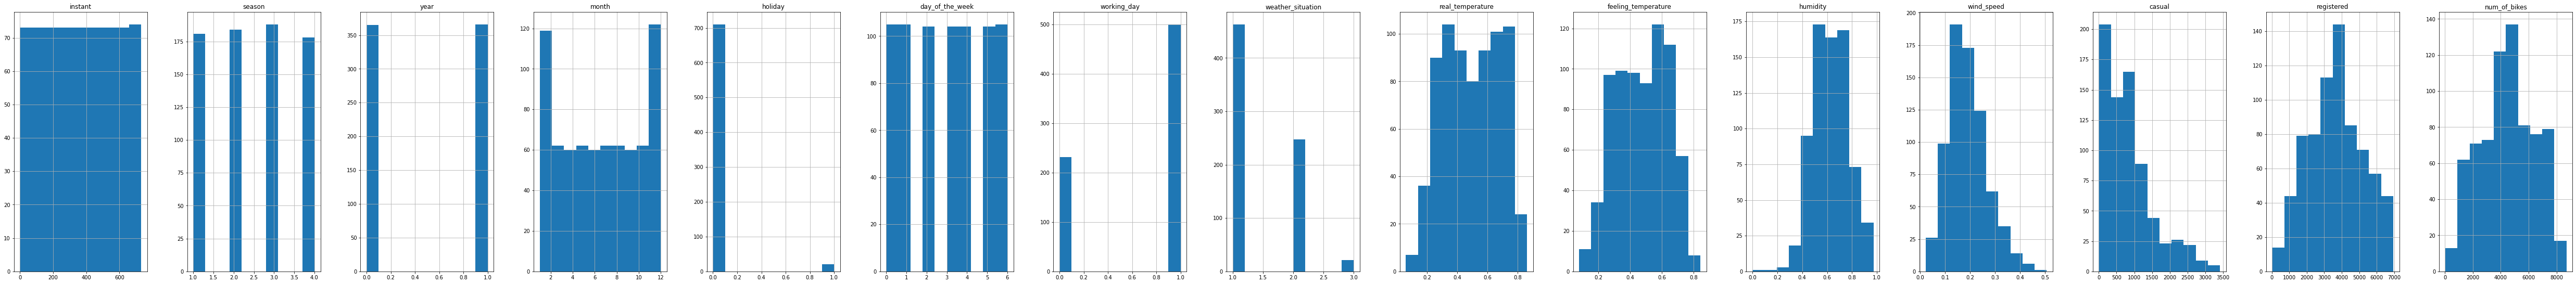

In [ ]:
df.hist(layout=(17,17), figsize=(100,200), sharex=False)
plt.show()

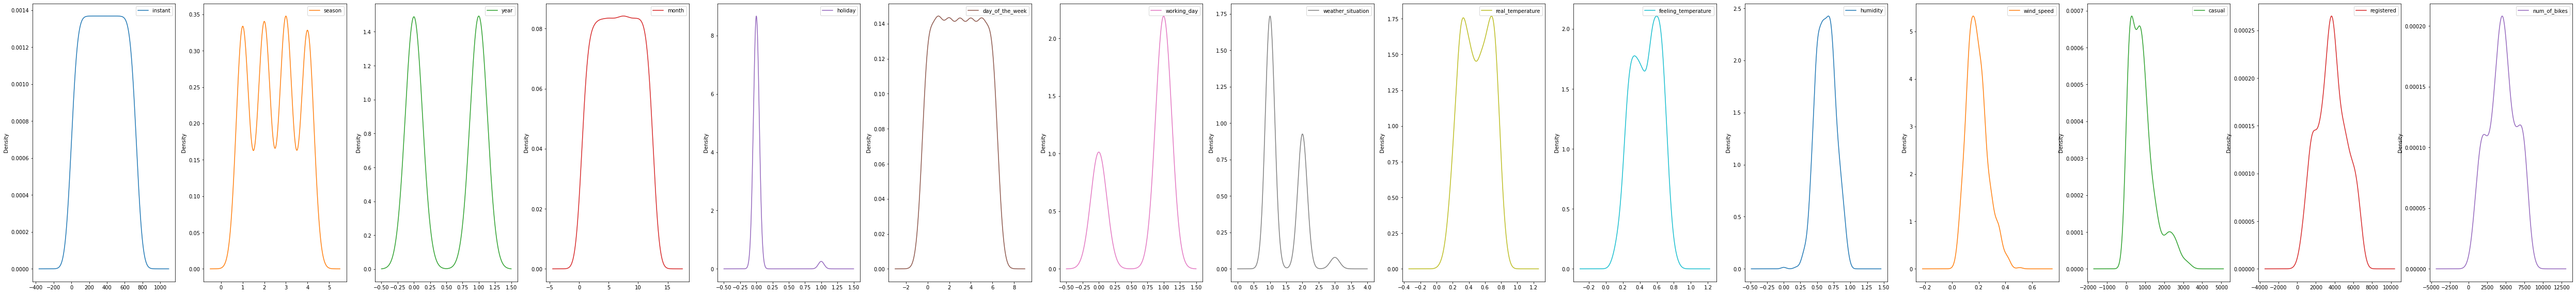

In [ ]:
df.plot(kind='density', subplots=True, layout=(17,17), figsize=(100,200), sharex=False)
plt.show()

In [ ]:
correlations = df.corr(method='pearson')
correlations

,instant,season,year,month,holiday,day_of_the_week,working_day,weather_situation,real_temperature,feeling_temperature,humidity,wind_speed,casual,registered,num_of_bikes
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
year,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
day_of_the_week,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
working_day,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weather_situation,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
real_temperature,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
feeling_temperature,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


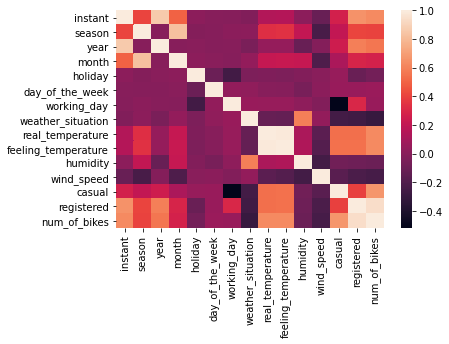

In [ ]:
sns.heatmap(correlations)

In [ ]:
df.describe()

,instant,season,year,month,holiday,day_of_the_week,working_day,weather_situation,real_temperature,feeling_temperature,humidity,wind_speed,casual,registered,num_of_bikes
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df.skew()

instant                0.000000
season                -0.000384
year                  -0.002742
month                 -0.008149
holiday                5.654224
day_of_the_week        0.002742
working_day           -0.793147
weather_situation      0.957385
real_temperature      -0.054521
feeling_temperature   -0.131088
humidity              -0.069783
wind_speed             0.677345
casual                 1.266454
registered             0.043659
num_of_bikes          -0.047353
dtype: float64

# Data Preparation

**Convert data to categorical**

In [ ]:
# Convert 'season', 'year' , 'month' , 'holiday', day_of_the_week, 'working_day', 'weather_situation'
df['season'] = df['year'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')
df['working_day'] = df['working_day'].astype('category')
df['weather_situation'] = df['weather_situation'].astype('category')
# Convert 'num_of_bikes'
df['num_of_bikes_categories'] = pd.cut(x=df['num_of_bikes'], bins=10, labels=[1,2,3,4,5,6,7,8,9,10])

**Visualize 'num_of_bikes' categories with ranges**

In [ ]:
df2=pd.DataFrame()
df2['num_of_bikes_ranges'] = pd.cut(x=df['num_of_bikes'], bins=10)
df2['num_of_bikes_categories'] = pd.cut(x=df['num_of_bikes'], bins=10, labels=[1,2,3,4,5,6,7,8,9,10])
df2 = df2.drop_duplicates(subset=['num_of_bikes_ranges','num_of_bikes_categories']).sort_values(by=['num_of_bikes_categories']).reset_index(drop=True)
df2

,num_of_bikes_ranges,num_of_bikes_categories
0,"(13.308, 891.2]",1
1,"(891.2, 1760.4]",2
2,"(1760.4, 2629.6]",3
3,"(2629.6, 3498.8]",4
4,"(3498.8, 4368.0]",5
5,"(4368.0, 5237.2]",6
6,"(5237.2, 6106.4]",7
7,"(6106.4, 6975.6]",8
8,"(6975.6, 7844.8]",9
9,"(7844.8, 8714.0]",10


# Feature Engineering

**Remove unwanted columns**

In [ ]:
# Remove 'date', 'instant', 'casual', 'registered', 'num_of_bikes'
df = df.drop(['date','instant','casual','registered','num_of_bikes'],axis=1)

**Final Dataset**

In [ ]:
df

,season,year,month,holiday,day_of_the_week,working_day,weather_situation,real_temperature,feeling_temperature,humidity,wind_speed,num_of_bikes_categories
0,0,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,2
1,0,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,1
2,0,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,2
3,0,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,2
4,0,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,2
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,3
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,4
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,2
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,3


# Model Training

**Split dataset into features and target labels**

In [ ]:
# Features
X_train = df.drop(['num_of_bikes_categories'], axis = 1)
# Target Labels
Y_train = df['num_of_bikes_categories']

**Train the model**

In [ ]:
dtree=DecisionTreeClassifier(criterion="gini", max_depth=6)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Plot the training model**

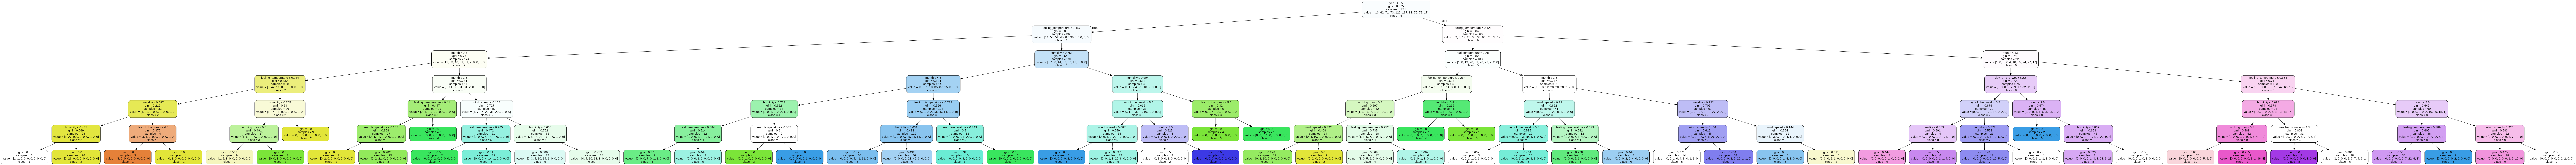

In [ ]:
dot_data = StringIO()
export_graphviz(  dtree, out_file=dot_data, feature_names=['season','year','month','holiday','day_of_the_week','working_day','weather_situation',
                  'real_temperature','feeling_temperature','humidity','wind_speed'], class_names=['1','2','3','4','5','6','7','8','9','10'],
                  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Important features**

In [ ]:
importance = dtree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %2d, Score: %.5f' % (i,v))

Feature:  0, Score: 0.00000
Feature:  1, Score: 0.10895
Feature:  2, Score: 0.20102
Feature:  3, Score: 0.00000
Feature:  4, Score: 0.04362
Feature:  5, Score: 0.04295
Feature:  6, Score: 0.00803
Feature:  7, Score: 0.06596
Feature:  8, Score: 0.31358
Feature:  9, Score: 0.15071
Feature: 10, Score: 0.06517


**Plot Important Features**

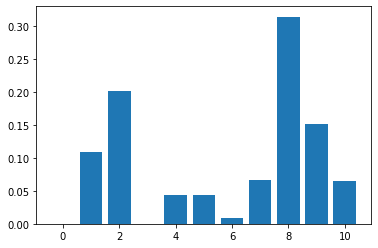

In [ ]:
# Important Features: month, feeling_temperature 
plt.bar([x for x in range(len(importance))], importance)
plt.show()